# Multi-layer Perceptron analysis (MLP)

Well, not really multilayer since I'm using only one hidden layer.  The goal of this section is to find out what is lowest dimensionality that has the highest discriminatory power for all task/experiment pairs.

A few observations:

- Overall, SVM outperforms MLP.  This is understandable given how few the number of samples are at this stage.
- I used a hidden size $h \in [1, 2, 3, 4, 8, 16, 32, 64, 128]$ and observed that $h = 8$ achives the best performance on test set.

In [1]:
import os
import sys
sys.path.insert(0, '/home/hadivafa/Dropbox/git/A1ToneDiscrimination/')
from utils.plot_functions import *

import numpy as np
import pandas as pd
from datetime import datetime
from os.path import join as pjoin
from copy import deepcopy as dc
from tqdm.notebook import tqdm
import pickle
import h5py

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [9]:
mlp_dir = '/home/hadivafa/Documents/Kanold/results/mlp'
hidden_sizes = sorted([int(x) for x in os.listdir(mlp_dir)])

hidden_sizes

[1, 2, 3, 4, 8, 16, 32, 64, 128]

In [12]:
import re

p_all = pd.DataFrame()
pf_all = pd.DataFrame()

for h in hidden_sizes:
    runs_dir = pjoin(mlp_dir, str(h))
    available_files = os.listdir(runs_dir)

    f_performances = list(filter(re.compile(r'performances_\[').match, available_files))[0]
    f_performances_filtered = list(filter(re.compile(r'performances_filtered_\[').match, available_files))[0]

    performances = pd.read_pickle(pjoin(runs_dir, f_performances))
    performances_filtered = pd.read_pickle(pjoin(runs_dir, f_performances_filtered))
    
    performances['hidden_size'] = h
    performances_filtered['hidden_size'] = h
    
    p_all = pd.concat([p_all, performances])
    pf_all = pd.concat([pf_all, performances_filtered])

## Figure: performance for different values of $h$ for different behavior tasks

- top row: 6 behavioral tasks
- bot row: 4 stimfrequency tasks

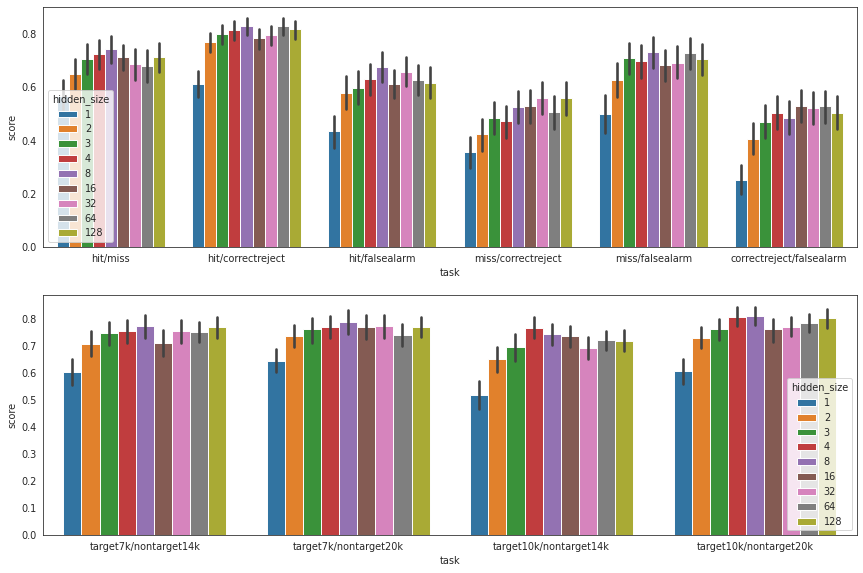

In [37]:
behavior_tasks = get_tasks()[:6]
stimfreq_tasks = get_tasks()[6:]

beh_df = pf_all.loc[(pf_all.metric == 'mcc') & (pf_all.task.isin(behavior_tasks))]
fre_df = pf_all.loc[(pf_all.metric == 'mcc') & (pf_all.task.isin(stimfreq_tasks))]

sns.set_style('white')
fig, ax_arr = plt.subplots(2, 1, figsize=(15, 10), dpi=70)

sns.barplot(x="task", y='score', hue="hidden_size", data=beh_df, dodge=True, ax=ax_arr[0])
sns.barplot(x="task", y='score', hue="hidden_size", data=fre_df, dodge=True, ax=ax_arr[1])

plt.show()

## Figure: average score as a function of $h$ over all tasks/experiments

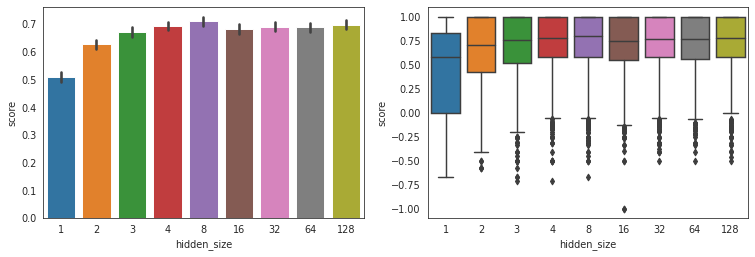

In [32]:
selected_df = pf_all.loc[(pf_all.metric == 'mcc')]

sns.set_style('white')
fig, ax_arr = plt.subplots(1, 2, figsize=(13, 4), dpi=70)

sns.barplot(data=selected_df, x='hidden_size', y='score', ax=ax_arr[0])
sns.boxplot(data=selected_df, x='hidden_size', y='score', ax=ax_arr[1])

plt.show()

### Discussion:

This analysis gives us some information about dimensionality of the data, but it is not directly comparable to SVM and Logistic Regression analysis.  The reason is for this model we have to fit more parameters and the drop in performance can be related to this fact.